In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import ndarray
from matplotlib.gridspec import GridSpec

In [2]:
train_data = pd.read_csv('./mnist_train.csv', header=None)
test_data = pd.read_csv("./mnist_test.csv", header=None)

In [3]:
train_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
test_y = test_data.iloc[:,0].to_numpy() 
test_X = test_data.drop(0, axis=1).to_numpy()

In [4]:
class Preprocess:
    def __init__(self):
        self.selected_columns = []
        
    def split(self, df: pd.DataFrame) -> tuple[ndarray, pd.DataFrame]:
        targets = df.iloc[:,0].to_numpy()
        inputs = df.drop(0, axis=1)
        return targets, inputs

    def scale(self, df: pd.DataFrame) -> ndarray:
        scaled_input = (df[self.selected_columns] / 255.)
        return scaled_input.to_numpy()
    
    def ohe(self, labels: ndarray) -> ndarray:
        output = np.zeros((labels.size, np.unique(labels).size))
        output[np.arange(labels.size), labels] = 1
        return output
    
    def train(self, df: pd.DataFrame) -> tuple[ndarray, ndarray]:
        dataset = df.copy()
        targets, inputs = self.split(dataset)
        self.selected_columns = inputs.columns[inputs.nunique() > 1] 
        X = self.scale(inputs)
        y = self.ohe(targets)
        return X,y
    
    def test(self, df: pd.DataFrame):
        dataset = df.copy()
        targets, inputs = self.split(dataset)
        
        X = self.scale(inputs)
        y = self.ohe(targets)
        return X,y
        

In [5]:
preprocessor = Preprocess()


In [6]:

X_train, y_train = preprocessor.train(train_data)

In [7]:
X_test, y_test = preprocessor.test(test_data)

In [8]:
from NN.layers import Dense, ReLU, Softmax
from NN.losses import CategoricalCrossEntropy
from NN.optimizers import SGD, Adam, RMSProp
from NN.nn import ANN
from NN.train import train

In [9]:
epochs = 50
losses = {
    'SGD': np.zeros(epochs),
    'Adam': np.zeros(epochs),
    'RMSProp': np.zeros(epochs)
    }

In [10]:
neural_nets = {}
optimizers = ['Adam', 'RMSProp', 'Momentum', 'SGD']
for optimizer in optimizers:
    neural_network = ANN([
    Dense(717, 32),
    ReLU(),
    Dense(32, 32),
    ReLU(),
    Dense(32, 10),
    Softmax()
], loss=CategoricalCrossEntropy)
    current_optimizer = None
    match optimizer:
        case 'Adam':
            current_optimizer = Adam(layers=neural_network.layers, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8)
        case 'RMSProp':
            current_optimizer = RMSProp(layers=neural_network.layers, lr=0.001, beta=0.9, epsilon=1e-8)
        case 'Momentum': 
            current_optimizer = SGD(layers=neural_network.layers, lr=0.1, momentum=0.3)
        case 'SGD':
            current_optimizer = SGD(layers=neural_network.layers, lr=0.1, momentum=0.0)
    print(current_optimizer)
    losses[optimizer] = train(nn=neural_network, X=X_train, y=y_train, optimizer=current_optimizer, epochs=epochs, batch_size=1024)
    neural_nets[optimizer] = neural_network
    print('\n\n')

Adam(lr=0.001, beta1=0.9, beta2=0.999)


  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:03<02:32,  3.11s/it]

Epoch: 0 	 Loss: 75.09088722916344


  6%|▌         | 3/50 [00:09<02:34,  3.28s/it]

Epoch: 2 	 Loss: 18.223937128942147


 10%|█         | 5/50 [00:15<02:20,  3.12s/it]

Epoch: 4 	 Loss: 14.034969673416501


 14%|█▍        | 7/50 [00:21<02:13,  3.11s/it]

Epoch: 6 	 Loss: 11.926190302960956


 18%|█▊        | 9/50 [00:28<02:07,  3.12s/it]

Epoch: 8 	 Loss: 10.506984131205236


 22%|██▏       | 11/50 [00:35<02:07,  3.27s/it]

Epoch: 10 	 Loss: 9.346329291713557


 26%|██▌       | 13/50 [00:41<01:57,  3.16s/it]

Epoch: 12 	 Loss: 8.38832512036945


 30%|███       | 15/50 [00:48<01:57,  3.36s/it]

Epoch: 14 	 Loss: 7.6183952959431736


 34%|███▍      | 17/50 [00:53<01:41,  3.09s/it]

Epoch: 16 	 Loss: 7.000096974768168


 38%|███▊      | 19/50 [00:59<01:31,  2.96s/it]

Epoch: 18 	 Loss: 6.512937530801143


 42%|████▏     | 21/50 [01:06<01:30,  3.13s/it]

Epoch: 20 	 Loss: 5.9784576714423725


 46%|████▌     | 23/50 [01:12<01:26,  3.21s/it]

Epoch: 22 	 Loss: 5.575981219707053


 50%|█████     | 25/50 [01:19<01:18,  3.16s/it]

Epoch: 24 	 Loss: 5.206568425882175


 54%|█████▍    | 27/50 [01:25<01:12,  3.16s/it]

Epoch: 26 	 Loss: 4.907961366683367


 58%|█████▊    | 29/50 [01:31<01:05,  3.13s/it]

Epoch: 28 	 Loss: 4.5851261731707105


 62%|██████▏   | 31/50 [01:39<01:10,  3.69s/it]

Epoch: 30 	 Loss: 4.385681244558141


 66%|██████▌   | 33/50 [01:49<01:12,  4.25s/it]

Epoch: 32 	 Loss: 4.076597215483192


 70%|███████   | 35/50 [01:57<01:03,  4.22s/it]

Epoch: 34 	 Loss: 3.884545032725542


 74%|███████▍  | 37/50 [02:04<00:47,  3.68s/it]

Epoch: 36 	 Loss: 3.703415061009569


 78%|███████▊  | 39/50 [02:11<00:40,  3.69s/it]

Epoch: 38 	 Loss: 3.494395996289958


 82%|████████▏ | 41/50 [02:21<00:38,  4.30s/it]

Epoch: 40 	 Loss: 3.3219981351231187


 86%|████████▌ | 43/50 [02:29<00:30,  4.37s/it]

Epoch: 42 	 Loss: 3.104136475171869


 90%|█████████ | 45/50 [02:39<00:22,  4.58s/it]

Epoch: 44 	 Loss: 2.9962617276610586


 94%|█████████▍| 47/50 [02:46<00:12,  4.09s/it]

Epoch: 46 	 Loss: 2.8643423479074888


 98%|█████████▊| 49/50 [02:53<00:03,  3.73s/it]

Epoch: 48 	 Loss: 2.749881255836139


100%|██████████| 50/50 [02:57<00:00,  3.55s/it]





RMSProp(lr=0.001, beta=0.9)


  2%|▏         | 1/50 [00:04<03:16,  4.01s/it]

Epoch: 0 	 Loss: 60.143546168384965


  6%|▌         | 3/50 [00:16<04:27,  5.69s/it]

Epoch: 2 	 Loss: 17.059856684234184


 10%|█         | 5/50 [00:27<04:12,  5.61s/it]

Epoch: 4 	 Loss: 13.14244050339445


 14%|█▍        | 7/50 [00:34<03:17,  4.60s/it]

Epoch: 6 	 Loss: 11.072234662287542


 18%|█▊        | 9/50 [00:43<02:59,  4.39s/it]

Epoch: 8 	 Loss: 9.64557139959664


 22%|██▏       | 11/50 [00:48<02:20,  3.60s/it]

Epoch: 10 	 Loss: 8.581384888849252


 26%|██▌       | 13/50 [00:55<02:02,  3.32s/it]

Epoch: 12 	 Loss: 7.685189356357663


 30%|███       | 15/50 [01:01<01:56,  3.33s/it]

Epoch: 14 	 Loss: 7.0806932160125395


 34%|███▍      | 17/50 [01:09<01:54,  3.48s/it]

Epoch: 16 	 Loss: 6.492568600772405


 38%|███▊      | 19/50 [01:15<01:44,  3.37s/it]

Epoch: 18 	 Loss: 6.031322708719444


 42%|████▏     | 21/50 [01:24<01:53,  3.91s/it]

Epoch: 20 	 Loss: 5.622753613164467


 46%|████▌     | 23/50 [01:32<01:45,  3.90s/it]

Epoch: 22 	 Loss: 5.290574176482685


 50%|█████     | 25/50 [01:38<01:28,  3.53s/it]

Epoch: 24 	 Loss: 4.991386318245131


 54%|█████▍    | 27/50 [01:46<01:24,  3.68s/it]

Epoch: 26 	 Loss: 4.716297389025583


 58%|█████▊    | 29/50 [01:51<01:06,  3.17s/it]

Epoch: 28 	 Loss: 4.490750709949417


 62%|██████▏   | 31/50 [01:57<00:58,  3.10s/it]

Epoch: 30 	 Loss: 4.272854047412868


 66%|██████▌   | 33/50 [02:05<01:01,  3.62s/it]

Epoch: 32 	 Loss: 4.075501726990332


 70%|███████   | 35/50 [02:13<00:56,  3.80s/it]

Epoch: 34 	 Loss: 3.89751965572859


 74%|███████▍  | 37/50 [02:21<00:50,  3.92s/it]

Epoch: 36 	 Loss: 3.7052605255183297


 78%|███████▊  | 39/50 [02:26<00:36,  3.30s/it]

Epoch: 38 	 Loss: 3.535666524937262


 82%|████████▏ | 41/50 [02:34<00:31,  3.52s/it]

Epoch: 40 	 Loss: 3.3566244689527736


 86%|████████▌ | 43/50 [02:42<00:26,  3.73s/it]

Epoch: 42 	 Loss: 3.210751341745069


 90%|█████████ | 45/50 [02:48<00:17,  3.41s/it]

Epoch: 44 	 Loss: 3.0689135165151518


 94%|█████████▍| 47/50 [02:55<00:10,  3.54s/it]

Epoch: 46 	 Loss: 2.977443389359475


 98%|█████████▊| 49/50 [03:06<00:04,  4.57s/it]

Epoch: 48 	 Loss: 2.8548093857093497


100%|██████████| 50/50 [03:10<00:00,  3.81s/it]





SGD(lr=0.1, momentum=0.3)


  2%|▏         | 1/50 [00:03<02:31,  3.10s/it]

Epoch: 0 	 Loss: 62.83060274380229


  6%|▌         | 3/50 [00:10<02:44,  3.49s/it]

Epoch: 2 	 Loss: 20.48843231603758


 10%|█         | 5/50 [00:16<02:17,  3.07s/it]

Epoch: 4 	 Loss: 16.891185474304525


 14%|█▍        | 7/50 [00:20<01:51,  2.59s/it]

Epoch: 6 	 Loss: 14.918567962029163


 18%|█▊        | 9/50 [00:27<02:00,  2.94s/it]

Epoch: 8 	 Loss: 13.482983206204105


 22%|██▏       | 11/50 [00:33<01:56,  3.00s/it]

Epoch: 10 	 Loss: 12.429260277920417


 26%|██▌       | 13/50 [00:38<01:42,  2.78s/it]

Epoch: 12 	 Loss: 11.529069221529658


 30%|███       | 15/50 [00:45<01:50,  3.16s/it]

Epoch: 14 	 Loss: 10.77877278149972


 34%|███▍      | 17/50 [00:53<01:57,  3.56s/it]

Epoch: 16 	 Loss: 10.150571849156744


 38%|███▊      | 19/50 [01:03<02:05,  4.06s/it]

Epoch: 18 	 Loss: 9.58469992633331


 42%|████▏     | 21/50 [01:11<01:59,  4.13s/it]

Epoch: 20 	 Loss: 9.13550031164425


 46%|████▌     | 23/50 [01:16<01:32,  3.44s/it]

Epoch: 22 	 Loss: 8.614768648256785


 50%|█████     | 25/50 [01:24<01:28,  3.53s/it]

Epoch: 24 	 Loss: 8.206193373974356


 54%|█████▍    | 27/50 [01:30<01:19,  3.45s/it]

Epoch: 26 	 Loss: 7.853091933310122


 58%|█████▊    | 29/50 [01:38<01:18,  3.75s/it]

Epoch: 28 	 Loss: 7.438144408354068


 62%|██████▏   | 31/50 [01:45<01:07,  3.56s/it]

Epoch: 30 	 Loss: 7.172286640916601


 66%|██████▌   | 33/50 [01:52<00:58,  3.46s/it]

Epoch: 32 	 Loss: 6.882572509873272


 70%|███████   | 35/50 [01:58<00:50,  3.35s/it]

Epoch: 34 	 Loss: 6.621565293039045


 74%|███████▍  | 37/50 [02:03<00:39,  3.02s/it]

Epoch: 36 	 Loss: 6.3928487976992


 78%|███████▊  | 39/50 [02:11<00:36,  3.30s/it]

Epoch: 38 	 Loss: 6.123295570935135


 82%|████████▏ | 41/50 [02:16<00:26,  2.95s/it]

Epoch: 40 	 Loss: 5.920554288408206


 86%|████████▌ | 43/50 [02:21<00:18,  2.66s/it]

Epoch: 42 	 Loss: 5.777365775222624


 90%|█████████ | 45/50 [02:26<00:12,  2.52s/it]

Epoch: 44 	 Loss: 5.551060965118878


 94%|█████████▍| 47/50 [02:31<00:07,  2.52s/it]

Epoch: 46 	 Loss: 5.3812438440188455


 98%|█████████▊| 49/50 [02:36<00:02,  2.70s/it]

Epoch: 48 	 Loss: 5.214772282567654


100%|██████████| 50/50 [02:41<00:00,  3.22s/it]





SGD(lr=0.1, momentum=0.0)


  2%|▏         | 1/50 [00:04<03:16,  4.00s/it]

Epoch: 0 	 Loss: 70.21803381256177


  6%|▌         | 3/50 [00:10<02:46,  3.54s/it]

Epoch: 2 	 Loss: 22.349957807932185


 10%|█         | 5/50 [00:16<02:22,  3.16s/it]

Epoch: 4 	 Loss: 18.238301428147057


 14%|█▍        | 7/50 [00:22<02:10,  3.03s/it]

Epoch: 6 	 Loss: 16.230288438781656


 18%|█▊        | 9/50 [00:28<02:03,  3.02s/it]

Epoch: 8 	 Loss: 14.875704017006356


 22%|██▏       | 11/50 [00:36<02:15,  3.48s/it]

Epoch: 10 	 Loss: 13.820160737652971


 26%|██▌       | 13/50 [00:45<02:29,  4.05s/it]

Epoch: 12 	 Loss: 12.895749660806427


 30%|███       | 15/50 [00:54<02:29,  4.28s/it]

Epoch: 14 	 Loss: 12.101719064708554


 34%|███▍      | 17/50 [01:00<01:58,  3.60s/it]

Epoch: 16 	 Loss: 11.406308628422105


 38%|███▊      | 19/50 [01:06<01:42,  3.31s/it]

Epoch: 18 	 Loss: 10.789582215322232


 42%|████▏     | 21/50 [01:11<01:28,  3.04s/it]

Epoch: 20 	 Loss: 10.240363036785697


 46%|████▌     | 23/50 [01:19<01:34,  3.48s/it]

Epoch: 22 	 Loss: 9.78790771738624


 50%|█████     | 25/50 [01:26<01:28,  3.56s/it]

Epoch: 24 	 Loss: 9.316627885485822


 54%|█████▍    | 27/50 [01:32<01:13,  3.20s/it]

Epoch: 26 	 Loss: 8.952044836067207


 58%|█████▊    | 29/50 [01:38<01:07,  3.21s/it]

Epoch: 28 	 Loss: 8.640162563036741


 62%|██████▏   | 31/50 [01:45<01:00,  3.19s/it]

Epoch: 30 	 Loss: 8.282757796421919


 66%|██████▌   | 33/50 [01:51<00:52,  3.10s/it]

Epoch: 32 	 Loss: 7.971000111239954


 70%|███████   | 35/50 [01:57<00:46,  3.11s/it]

Epoch: 34 	 Loss: 7.740274021594074


 74%|███████▍  | 37/50 [02:03<00:39,  3.02s/it]

Epoch: 36 	 Loss: 7.513820687988158


 78%|███████▊  | 39/50 [02:09<00:33,  3.05s/it]

Epoch: 38 	 Loss: 7.272365164651974


 82%|████████▏ | 41/50 [02:16<00:29,  3.24s/it]

Epoch: 40 	 Loss: 7.087912872588979


 86%|████████▌ | 43/50 [02:23<00:23,  3.37s/it]

Epoch: 42 	 Loss: 6.868224050531305


 90%|█████████ | 45/50 [02:30<00:17,  3.57s/it]

Epoch: 44 	 Loss: 6.6757926335084035


 94%|█████████▍| 47/50 [02:37<00:11,  3.68s/it]

Epoch: 46 	 Loss: 6.4584913279218075


 98%|█████████▊| 49/50 [02:45<00:03,  3.70s/it]

Epoch: 48 	 Loss: 6.367991345907257


100%|██████████| 50/50 [02:48<00:00,  3.37s/it]

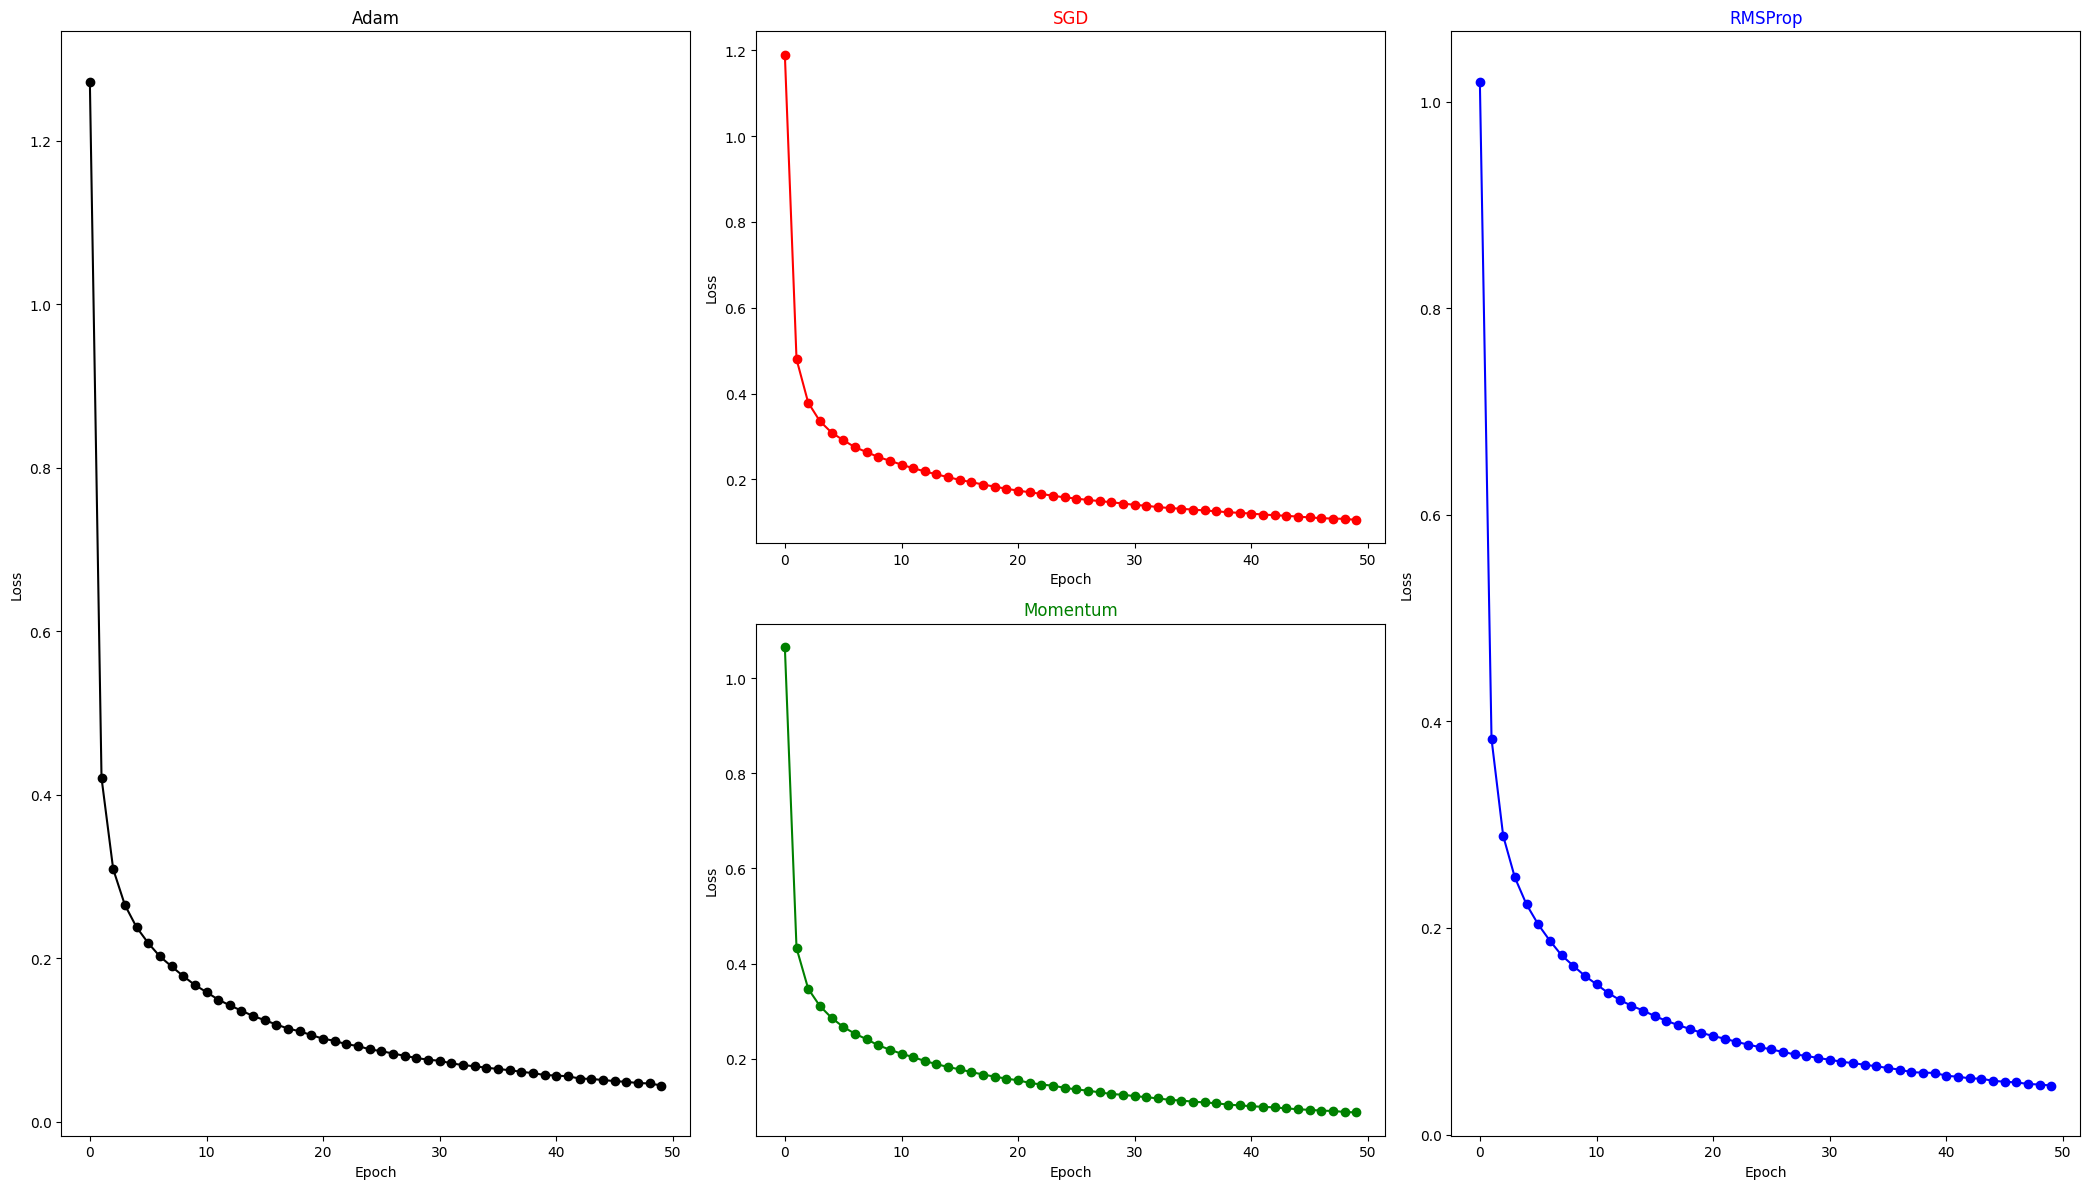

In [14]:
n_rows, n_cols = 12,12
gs = GridSpec(n_rows, n_cols)
fig = plt.figure(figsize=(21,12))

c = ['k', 'r', 'g', 'b']
adam_ax = fig.add_subplot(gs[0:,0:4])
sgd_ax = fig.add_subplot(gs[0:6,4:8])
momentum_ax = fig.add_subplot(gs[6:,4:8])
rms_ax = fig.add_subplot(gs[0:,8:])

adam_ax.plot(losses['Adam'], c=c[0], marker='o')
adam_ax.set_title("Adam", c=c[0])
adam_ax.set_ylabel("Loss")
adam_ax.set_xlabel("Epoch")

sgd_ax.plot(losses['SGD'], c=c[1],  marker='o')
sgd_ax.set_title("SGD", c=c[1])
sgd_ax.set_ylabel("Loss")
sgd_ax.set_xlabel("Epoch")

momentum_ax.plot(losses['Momentum'], c=c[2],  marker='o')
momentum_ax.set_title("Momentum", c=c[2])
momentum_ax.set_ylabel("Loss")
momentum_ax.set_xlabel("Epoch")


rms_ax.plot(losses['RMSProp'], c=c[3],  marker='o')
rms_ax.set_title("RMSProp", c=c[3])
rms_ax.set_ylabel("Loss")
rms_ax.set_xlabel("Epoch")


plt.tight_layout()

In [15]:
def accuracy(y_true, y_pred):
    y = y_true
    if len(y_true.shape) == 1:
        y = y_true.reshape(-1,1)
    return np.sum(y == y_pred) * 100 / y_pred.size 

In [27]:
nn_accuracies = {}
predictions = {}

for opt, nn in neural_nets.items():
    with nn.no_grad():
        pred = np.argmax(nn(X_test), axis=1, keepdims=True)
    predictions[opt] = pred
    nn_accuracies[opt] = accuracy(test_y, pred)


(96.0, 97.0)

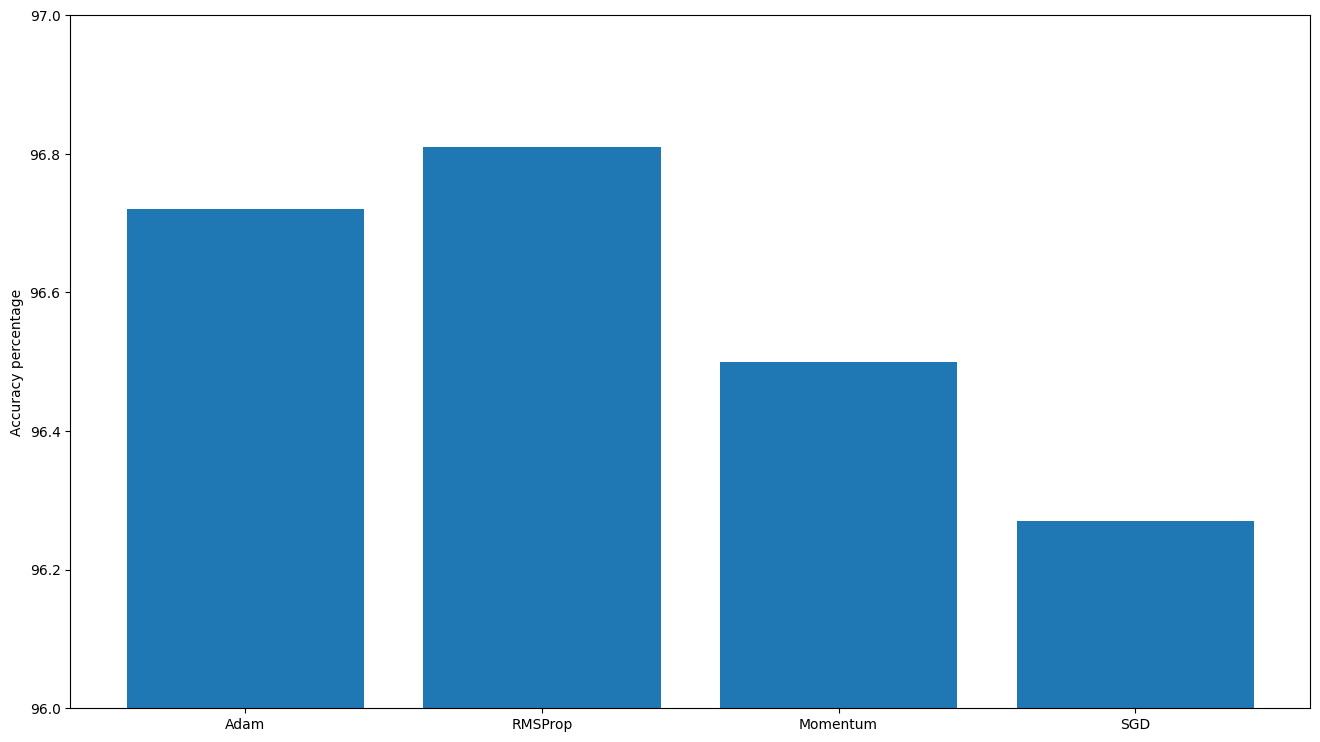

In [28]:
plt.figure(figsize=(16,9))
plt.bar(nn_accuracies.keys(), nn_accuracies.values())
plt.ylabel("Accuracy percentage")
plt.ylim([96,97])


In [29]:
nn_accuracies

{'Adam': np.float64(96.72),
 'RMSProp': np.float64(96.81),
 'Momentum': np.float64(96.5),
 'SGD': np.float64(96.27)}

In [61]:

def plot_random_predictions(optimizer: str, n_rows: int = 4, n_cols: int = 8) -> None:
    idx = np.random.choice(X_test.shape[0], n_rows*n_cols)
    images = test_X[idx]
    labels = test_y[idx]
    current_pred = predictions[optimizer][idx].flatten()
    gs = GridSpec(n_rows,n_cols)
    fig = plt.figure(figsize=(21,9))
    c = ['g','r']
    for i in range(n_rows):
        for j in range(n_cols):
            curr_idx = i*n_cols + j
            ax = fig.add_subplot(gs[i,j])
            img = np.reshape(images[curr_idx], (28, 28, 1))
            is_correct = labels[curr_idx] == current_pred[curr_idx]
            ax.imshow(img, cmap='inferno_r' if is_correct else "inferno")
            ax.set_title(f"Predicted: {current_pred[curr_idx]} Actual: {labels[curr_idx]}\n", c = c[int(not is_correct)])
            ax.set_xticks([])
            ax.set_yticks([])
    plt.tight_layout()

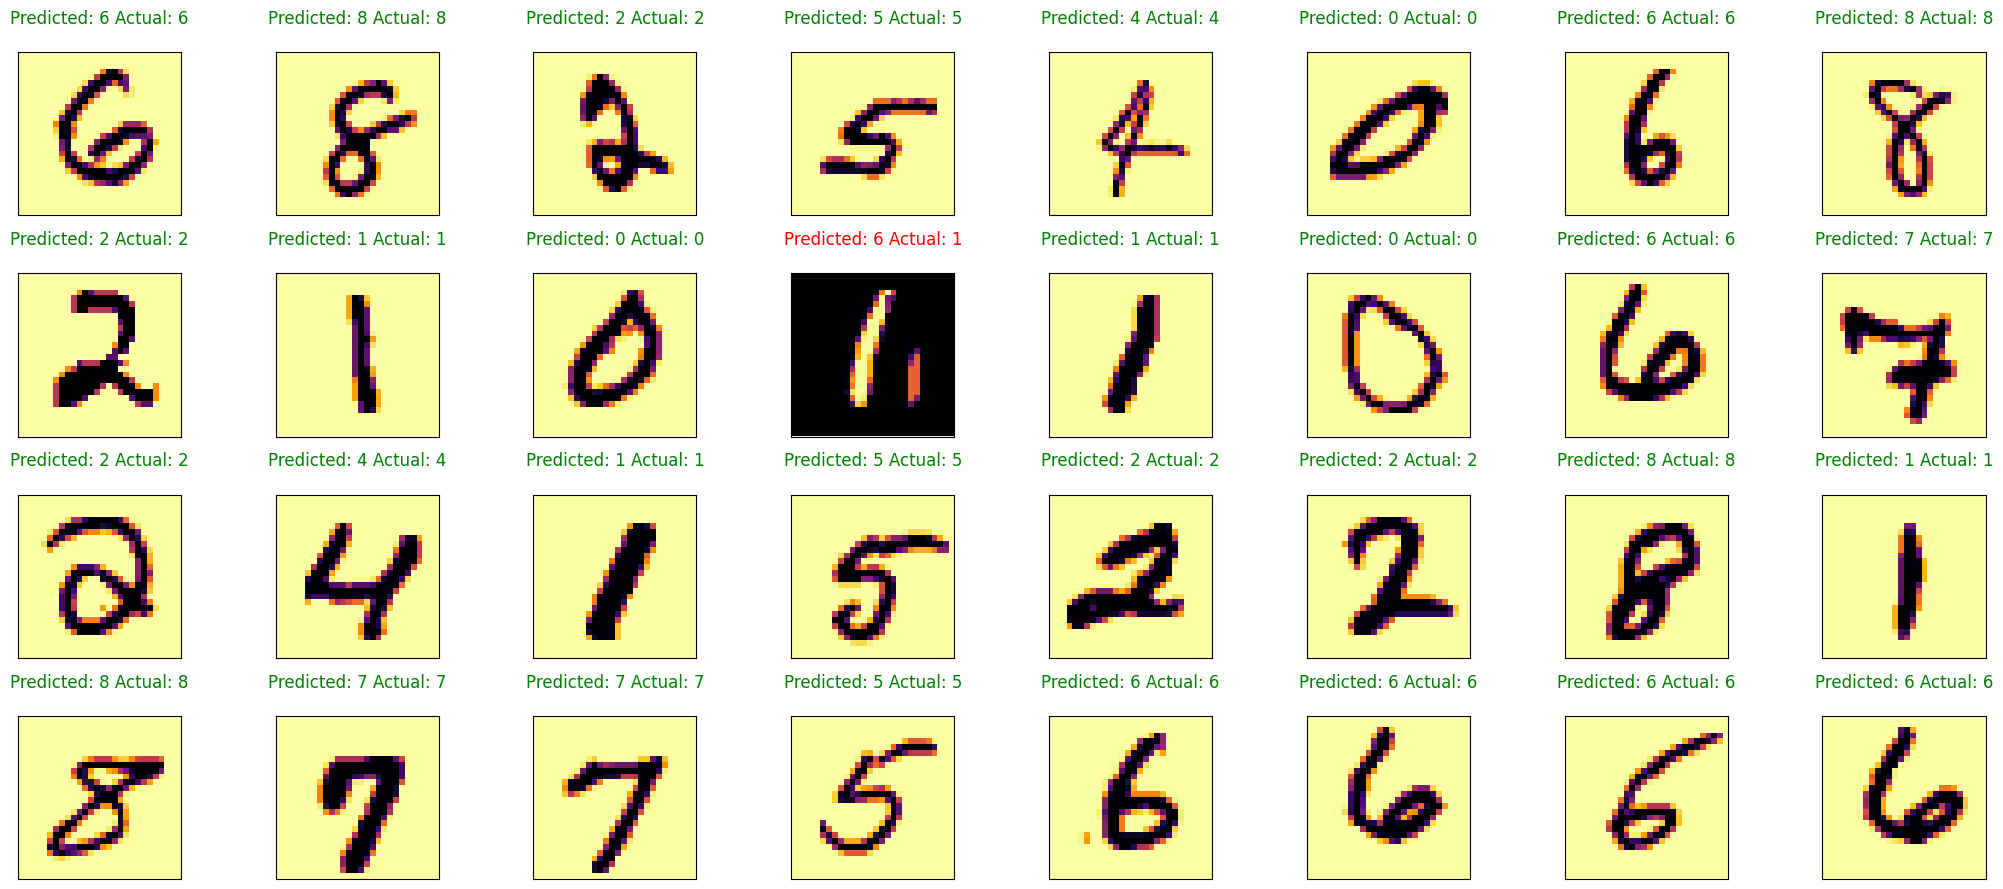

In [122]:
plot_random_predictions('Adam')

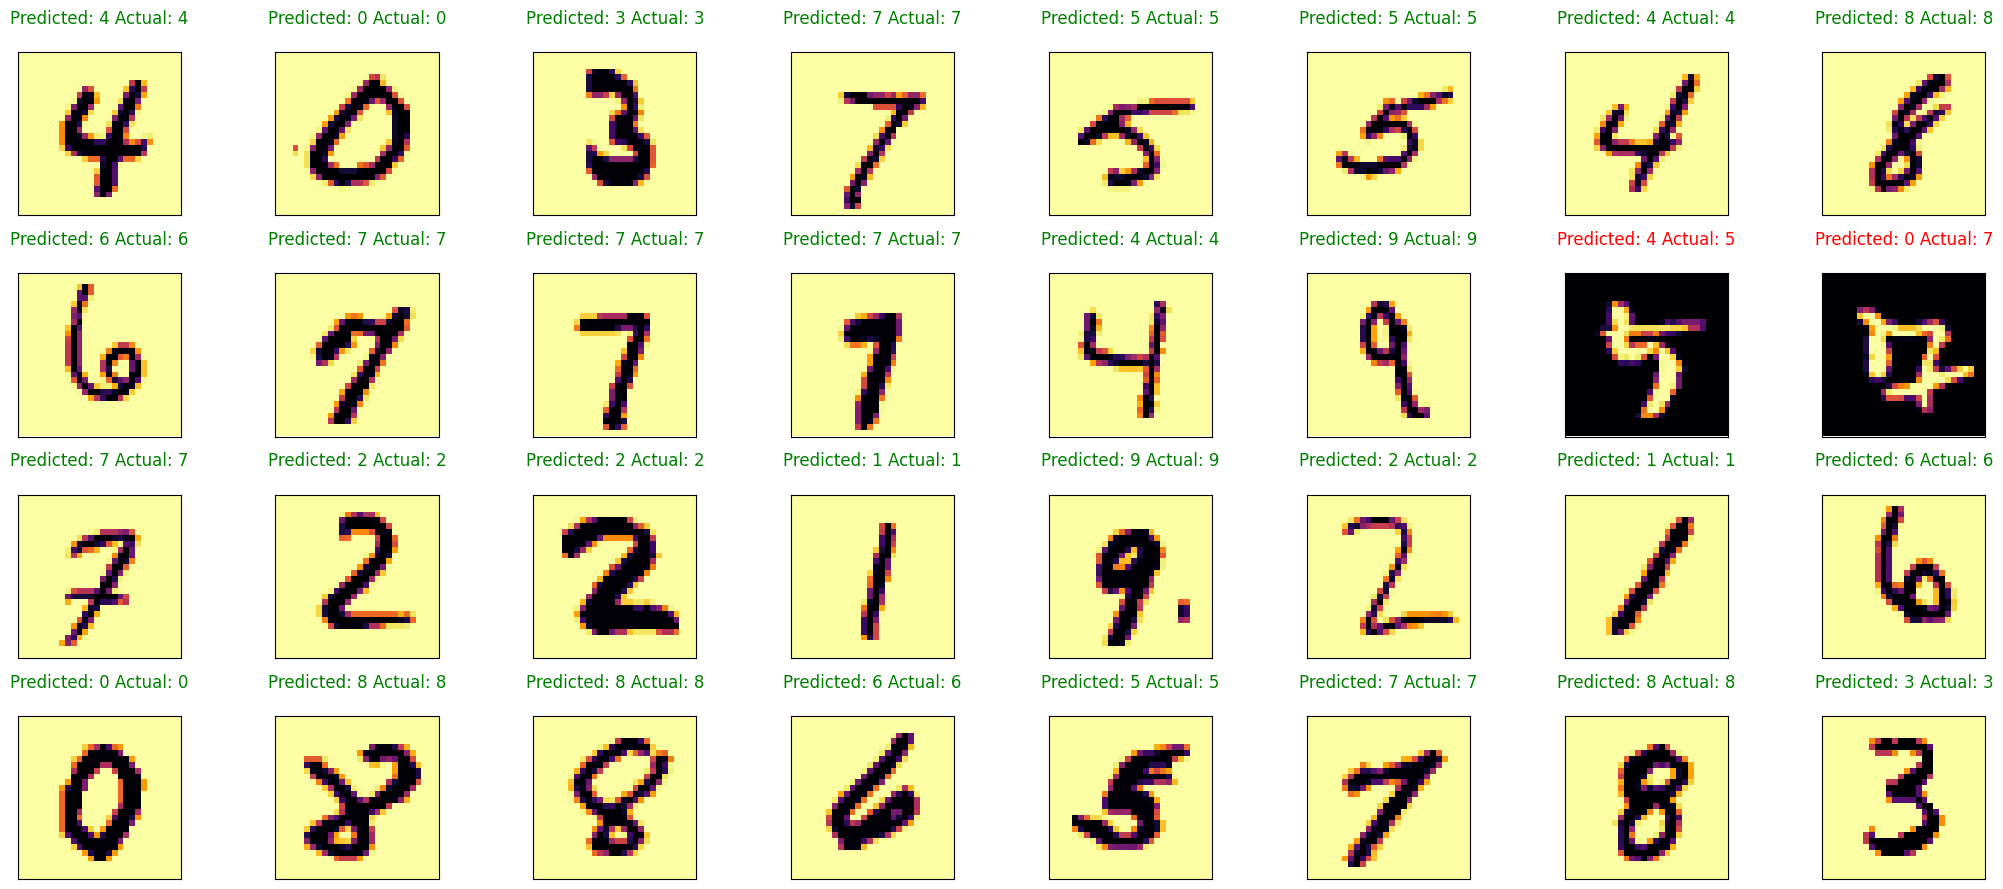

In [123]:
plot_random_predictions('RMSProp')

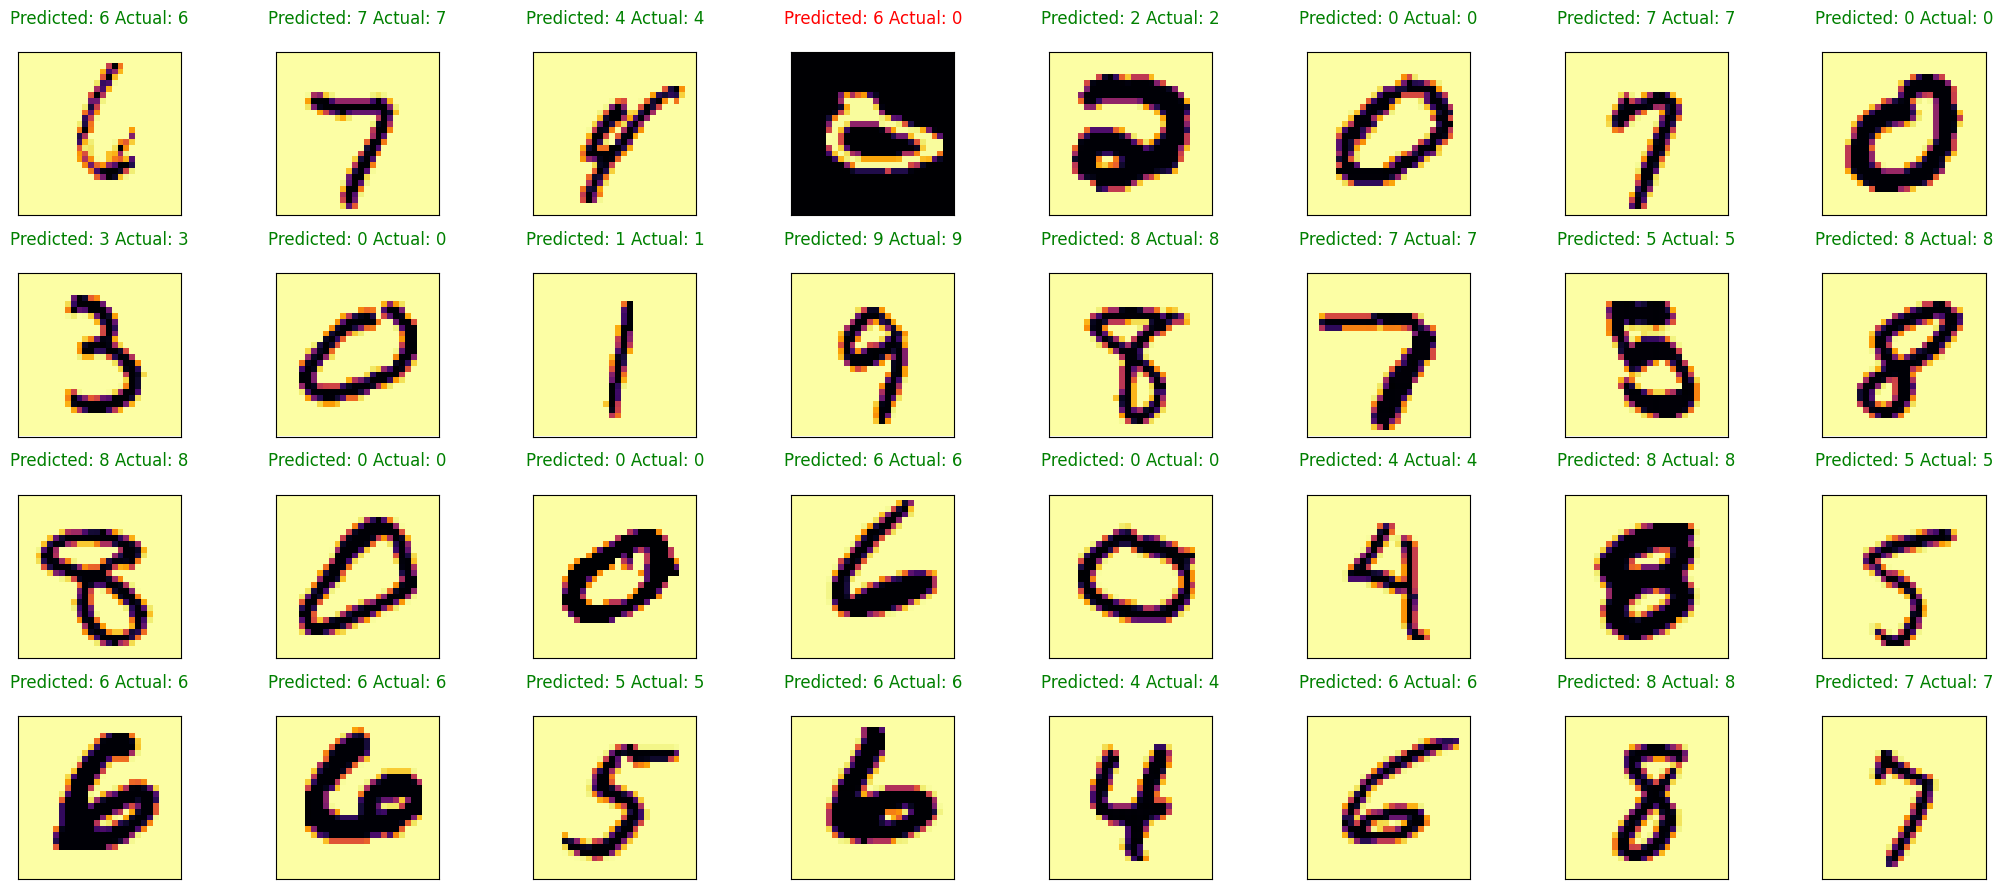

In [126]:
plot_random_predictions('Momentum')

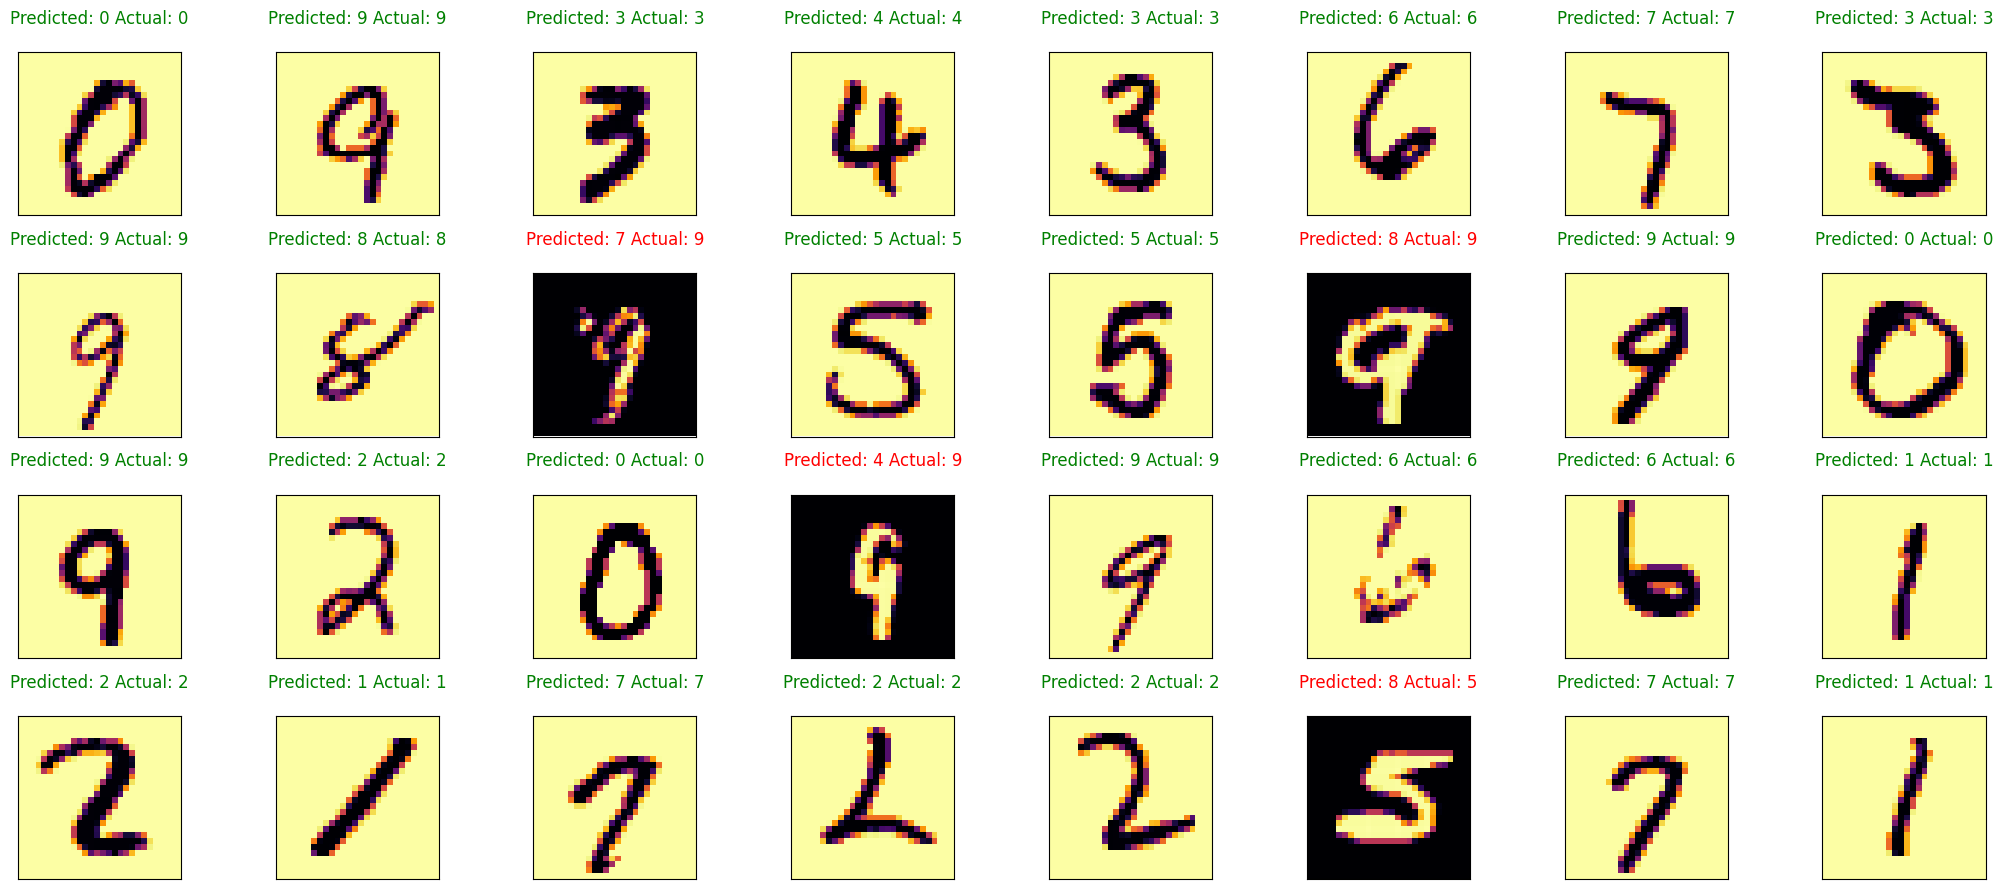

In [65]:
plot_random_predictions('SGD')

In [117]:
failed = {}
for opt in optimizers:
    failed[opt] = np.where(predictions[opt] != test_y.reshape(-1,1))[0]
     
def plot_failed(optimizer: str, n_rows: int = 4, n_cols: int = 8) -> None:
    n = n_cols * n_rows
    idx = np.random.permutation(failed[optimizer])[:n]
    images = test_X[idx]
    labels = test_y[idx]
    curr_predictions = predictions[optimizer][idx].flatten()
    gs = GridSpec(n_rows,n_cols)
    fig = plt.figure(figsize=(21,9))
    c = ['g','r']
    for i in range(n_rows):
        for j in range(n_cols):
            curr_idx = i*n_cols + j
            ax = fig.add_subplot(gs[i,j])
            img = np.reshape(images[curr_idx], (28, 28, 1))
            is_correct = labels[curr_idx] == curr_predictions[curr_idx]
            ax.imshow(img, cmap='inferno_r' if is_correct else "inferno")
            ax.set_title(f"Predicted: {curr_predictions[curr_idx]} Actual: {labels[curr_idx]}", c = c[int(not is_correct)])
            ax.set_xticks([])
            ax.set_yticks([])
    plt.title(optimizer)
    plt.tight_layout()
    plt.show()


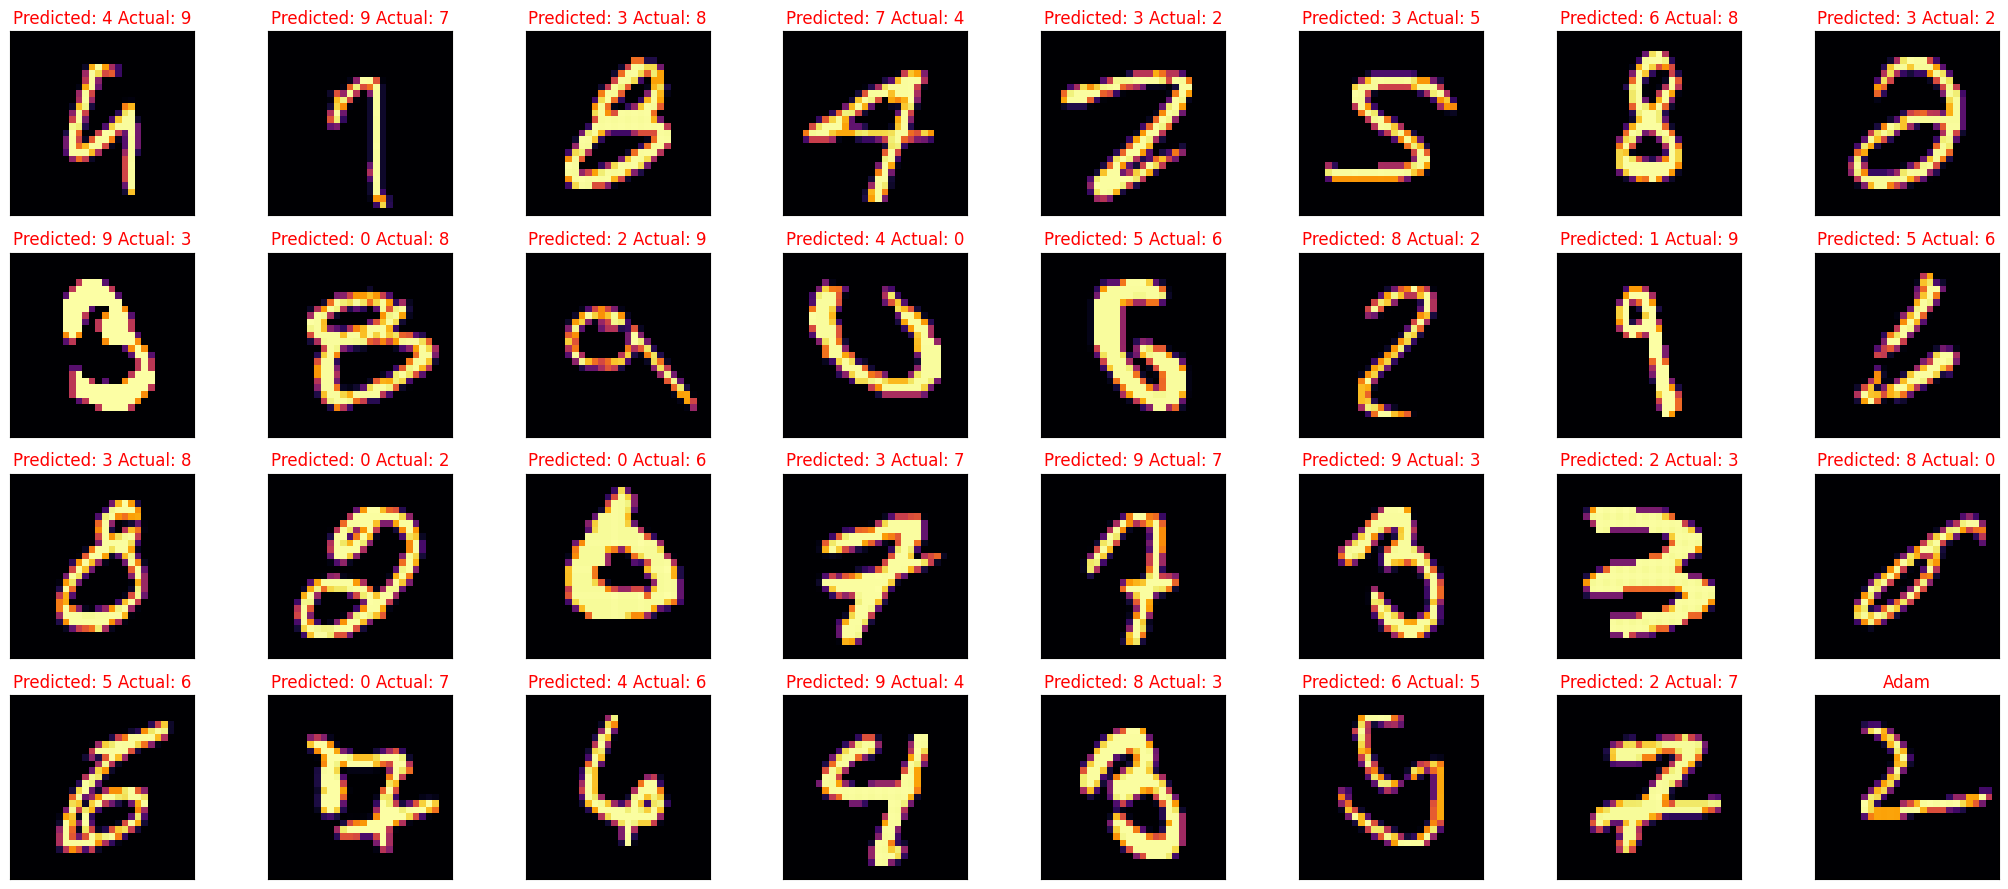

In [118]:
plot_failed('Adam')

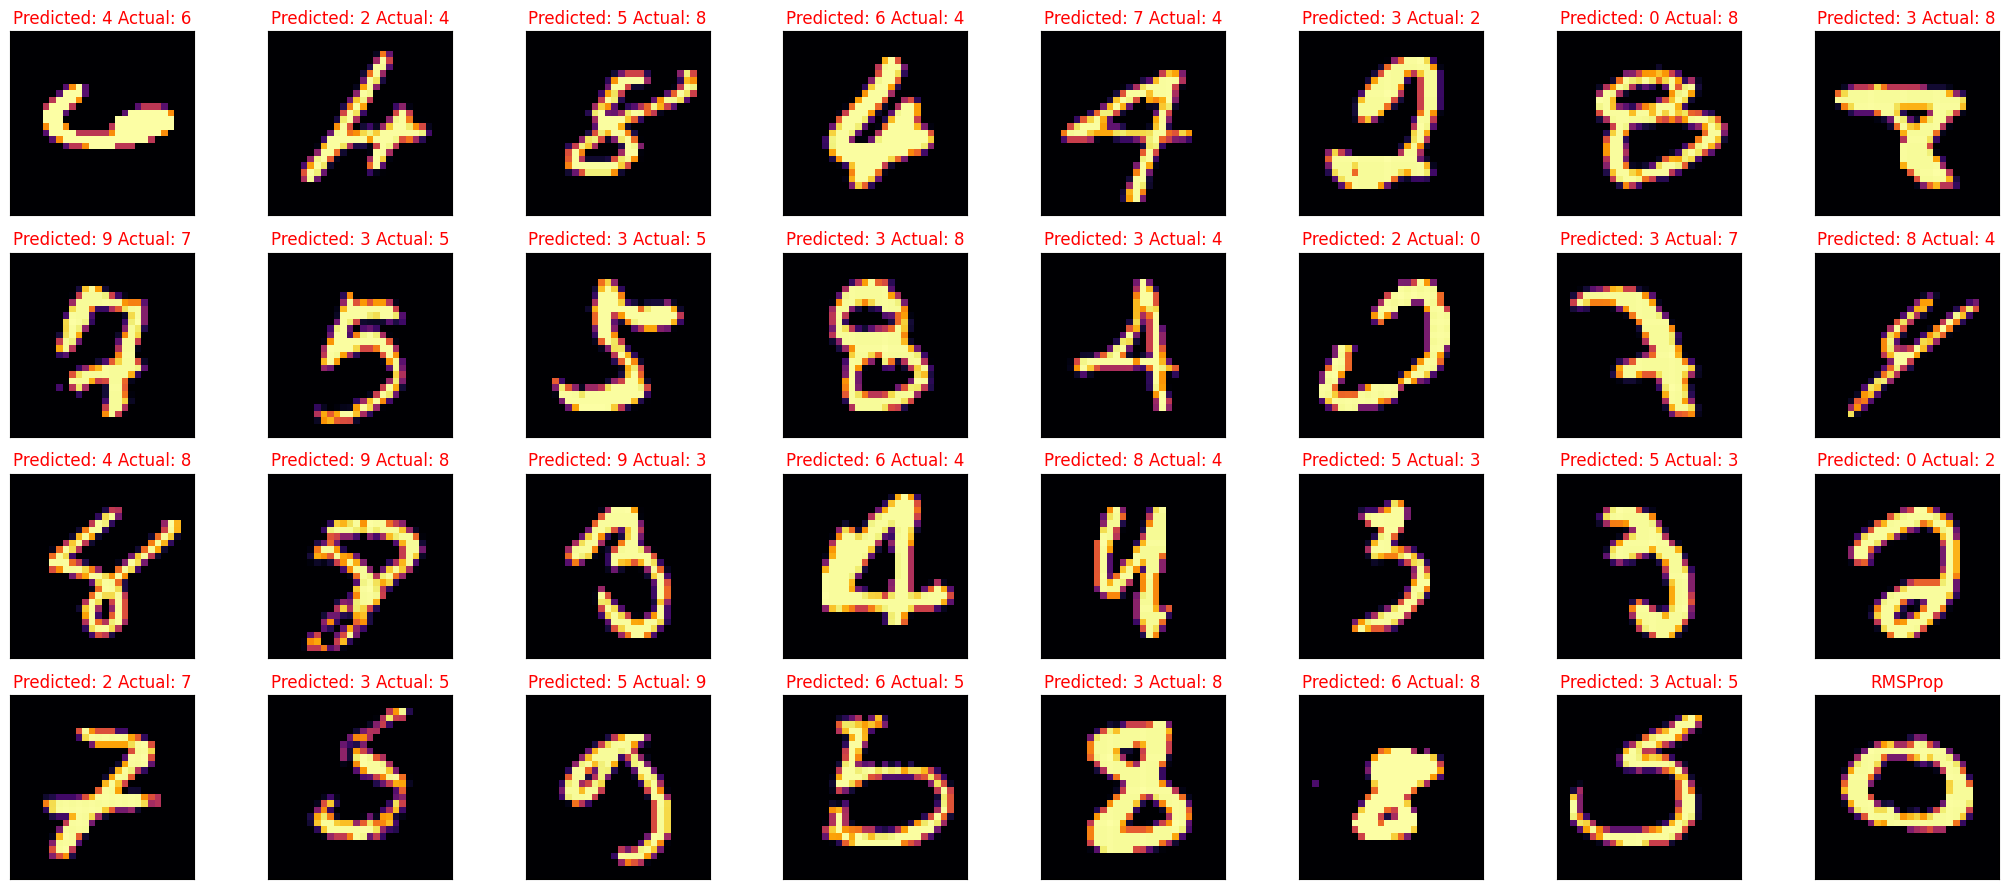

In [119]:
plot_failed('RMSProp')

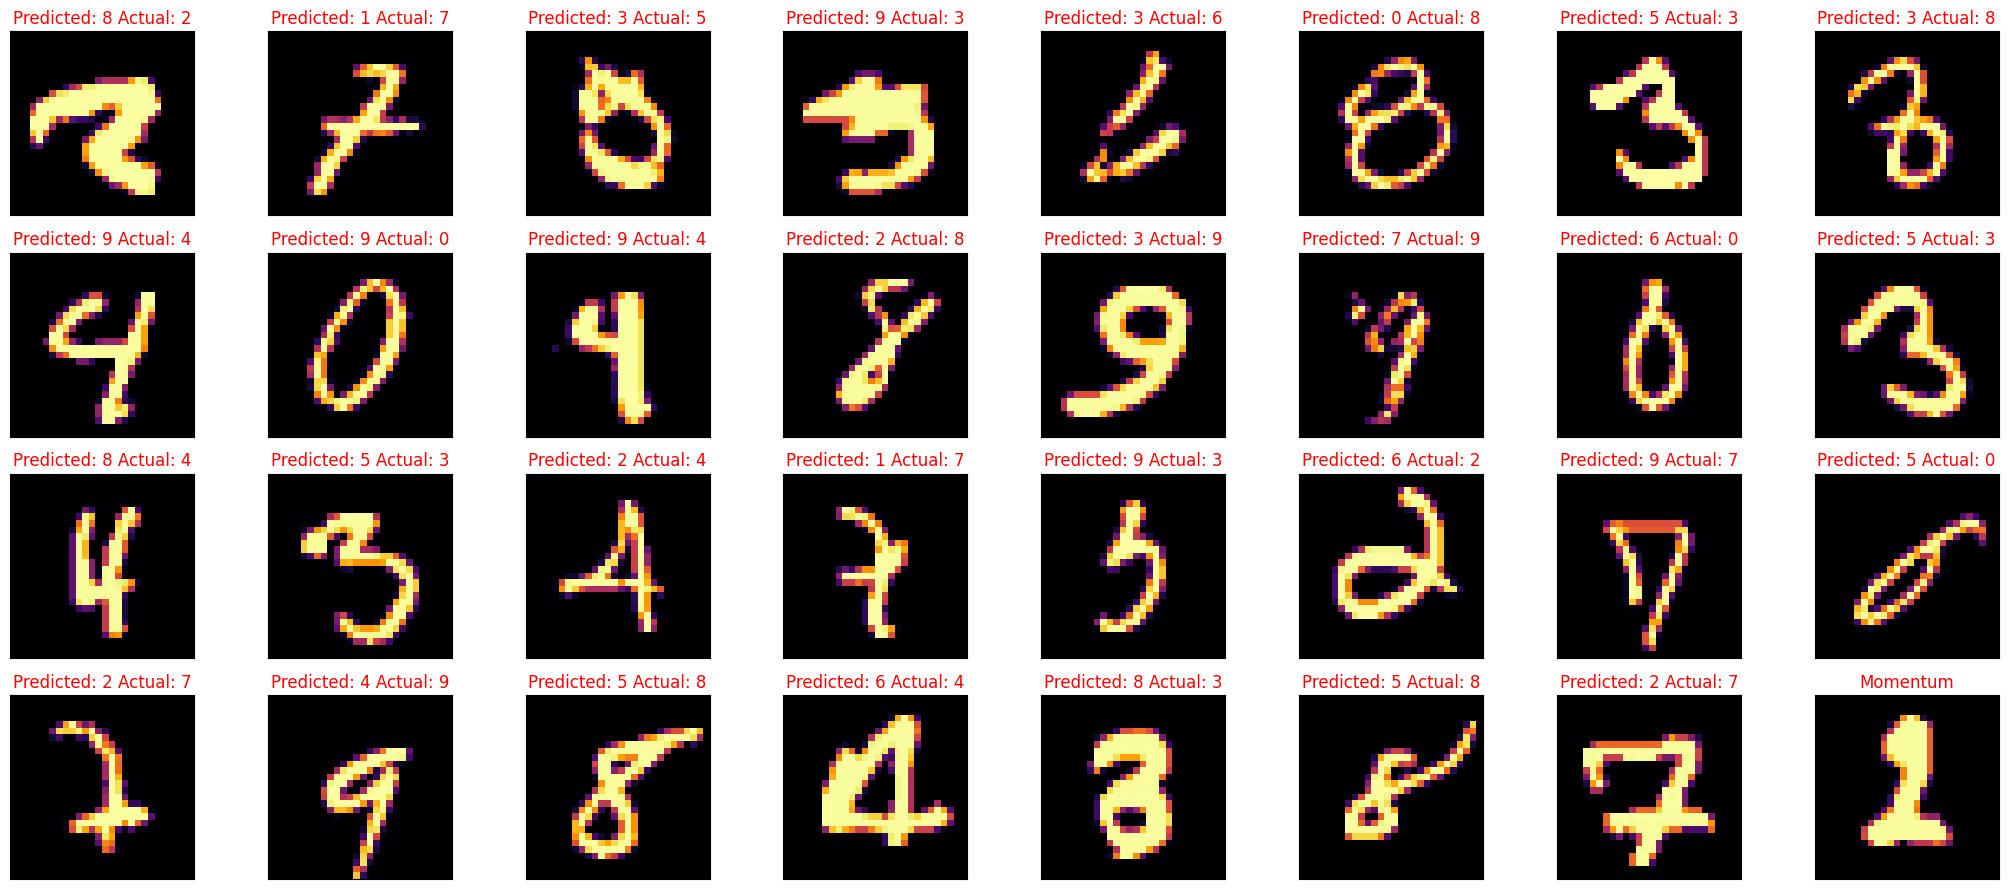

In [120]:
plot_failed('Momentum')

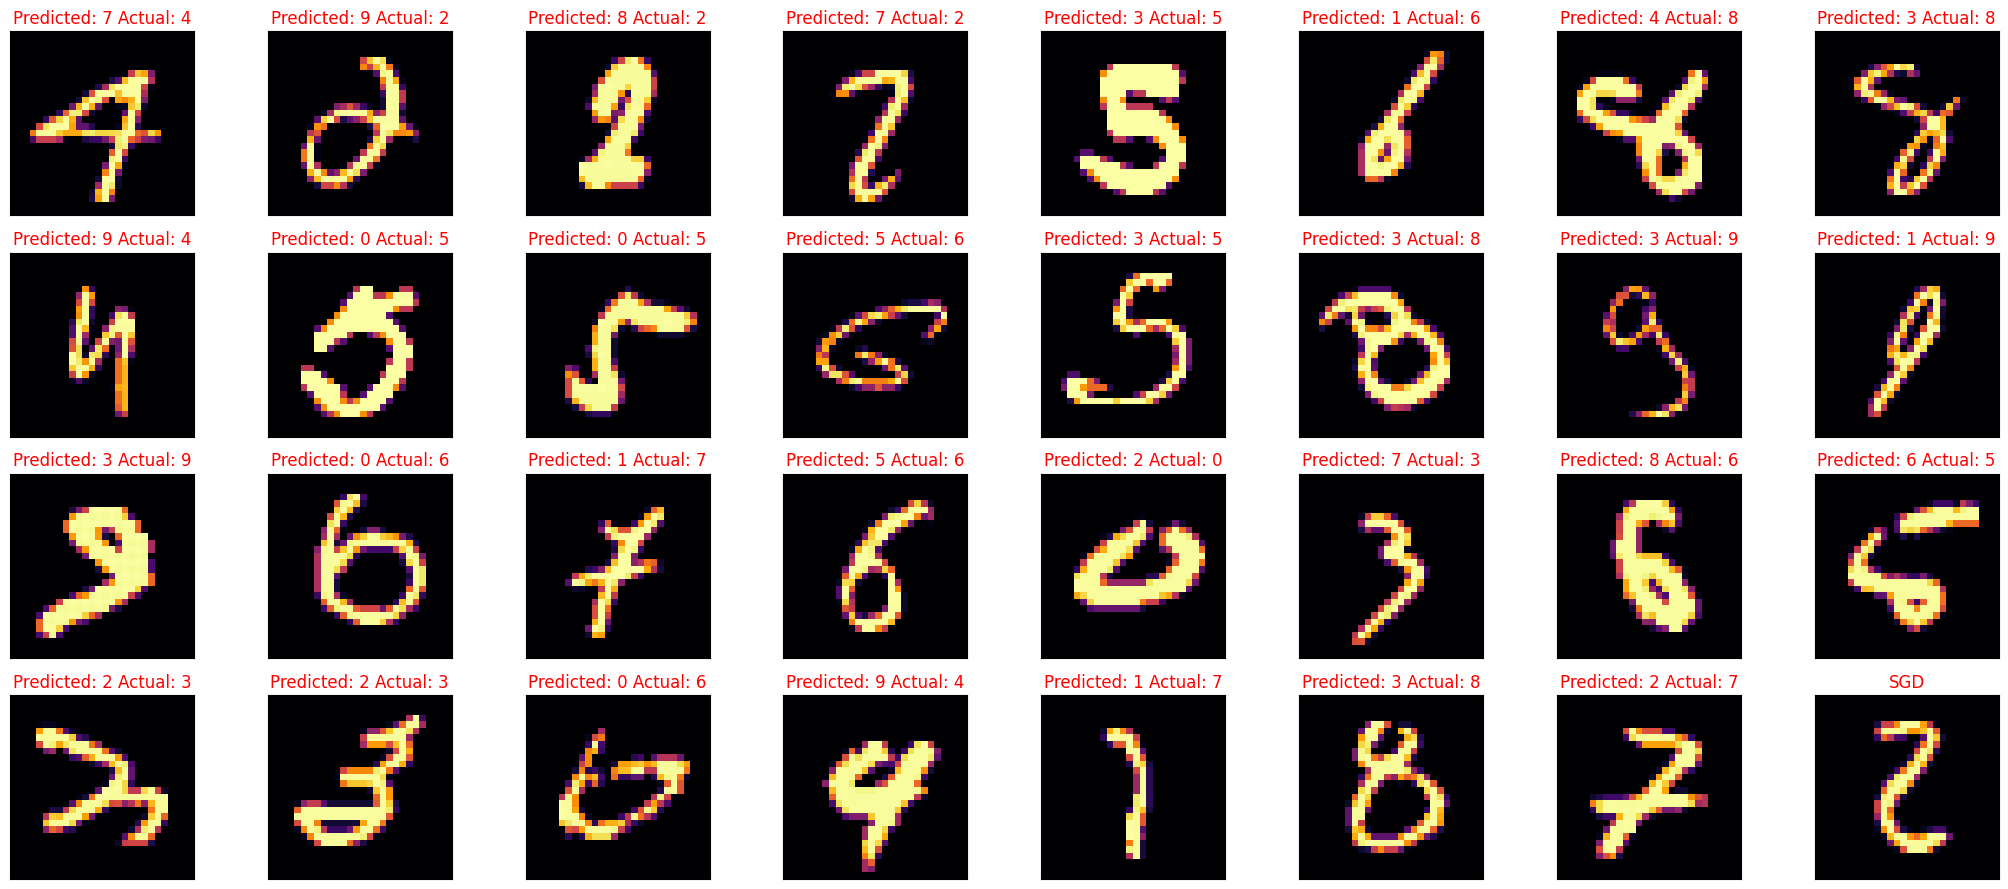

In [121]:
plot_failed("SGD")